w_1 = 7.86 w_2 = 5.65 b = 1.67
for 25 km/hr and 1 ammo survival rate is 100.00 %


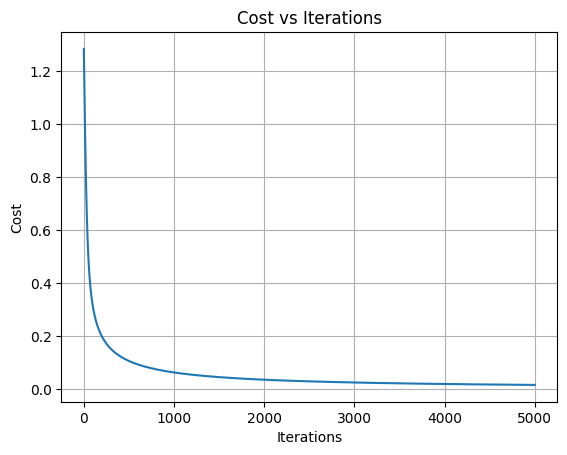

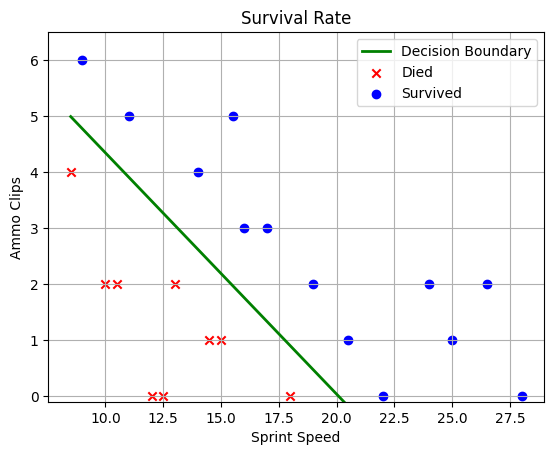

In [88]:
import numpy as np
import matplotlib.pyplot as plt

Sprint_Speed = [12,14.5,10,18,8.5,15,22,11,13,20.5,24,16,12.5,28,9,25,
                14,19,10.5,26.5,15.5,17]

Ammo_Clips = [0,1,2,0,4,1,0,5,2,1,2,3,0,0,6,1,4,2,2,2,5,3]

Result = [0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1]

x_1 = np.array(Sprint_Speed, dtype=float)
x_2 = np.array(Ammo_Clips, dtype=float)
y = np.array(Result, dtype=float)

x_1_mean = np.mean(x_1)
x_2_mean = np.mean(x_2)

x_1_std = np.std(x_1)
x_2_std = np.std(x_2)

x_1_norm = (x_1 - x_1_mean) / x_1_std
x_2_norm = (x_2 - x_2_mean) / x_2_std

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

w_1 = np.random.randn()
w_2 = np.random.randn()
b = np.random.randn()
alpha = 0.1

cost = []
m = len(y)
def cost_function(y, y_pred):
  eps = 1e-15
  y_pred = np.clip(y_pred, eps, 1 - eps)
  cost = -(1/m)*np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
  return cost



for i in range(5000):
  y_pred = sigmoid(w_1 * x_1_norm + w_2 * x_2_norm + b)
  cost_value = cost_function(y, y_pred)
  cost.append(cost_value)


  dw_1 = (1 / m) * np.sum((y_pred - y)*x_1_norm)
  dw_2 = (1 / m) * np.sum((y_pred - y)*x_2_norm)
  db = (1 / m) * np.sum(y_pred - y)

  w_1 = w_1 - alpha * dw_1
  w_2 = w_2 - alpha * dw_2
  b = b - alpha * db

print(f"w_1 ={w_1: .2f} w_2 ={w_2: .2f} b ={b: .2f}")

x_1_test = 25
x_1_test_norm = (x_1_test - x_1_mean) / x_1_std
x_2_test = 1
x_2_test_norm = (x_2_test - x_2_mean) / x_2_std

y_pred_test = sigmoid(w_1*x_1_test_norm + w_2*x_2_test_norm + b)
print(f"for 25 km/hr and 1 ammo survival rate is{y_pred_test*100: .2f} %")

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.show()

for i in range(m):
  if y[i] == 0:
    plt.scatter(x_1[i], x_2[i],marker = 'x', color='red')
  else :
    plt.scatter(x_1[i], x_2[i],marker = 'o', color='blue')

x_val = np.array([min(x_1),max(x_1)])

x_norm = (x_val - x_1_mean) / x_1_std

y_norm = -(w_1*x_norm + b) / w_2

y_val = y_norm * x_2_std + x_2_mean

plt.plot(x_val,y_val,color = "green",label = "Decision Boundary",linewidth = 2)
plt.ylim(-0.1, max(x_2) + 0.5)

plt.scatter([],[],marker = 'x',color = 'red',label = "Died")
plt.scatter([],[],marker = 'o',color = 'blue',label = "Survived")

plt.xlabel("Sprint Speed")
plt.ylabel("Ammo Clips")
plt.title("Survival Rate")
plt.grid(True)
plt.legend()
plt.show()
